In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_ollama import ChatOllama 
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver 

In [2]:
load_dotenv()
llm = ChatOllama(model = 'gemini-3-flash-preview:cloud')

In [3]:
class JokeState(TypedDict):

    topic: str
    joke: str
    explanation: str
    

In [ ]:
def generate_joke(state: JokeState):

    prompt = f"generate a joke on the topic {state['topic']}"
    response = llm.invoke(prompt).content

    return {'joke': response}

In [6]:
def generate_explanation(state: JokeState):

    prompt = f'Write an explanation for the joke - {state["joke"]}'
    response = llm.invoke(prompt).content
    
    return {'explanation': response}

In [7]:
graph = StateGraph(JokeState)

# add nodes 
graph.add_node('generate_joke', generate_joke)
graph.add_node('generate_explanation', generate_explanation)

# add edges
graph.add_edge(START, 'generate_joke')
graph.add_edge('generate_joke', 'generate_explanation')
graph.add_edge('generate_explanation', END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)


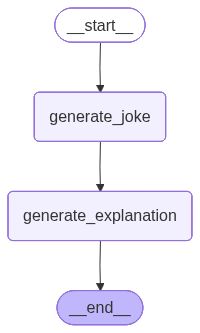

In [8]:
workflow

In [9]:
config1 = {'configurable': {'thread_id': '1'}}
workflow.invoke({'topic':'pizza'}, config = config1)

{'topic': 'pizza',
 'joke': 'Why did the pizza maker go to jail?\n\nBecause he **kneaded** the dough!',
 'explanation': 'This joke is a **pun**, which is a play on words that sound the same but have different meanings. To understand the joke, you have to look at the two different ways the punchline can be interpreted:\n\n### 1. The Literal Meaning (Pizza Making)\nIn the world of baking, to **knead** means to massage and press पहुँचा (dough) with your hands to prepare it for baking. A pizza maker spends their whole day **kneading dough**. This is a normal, legal activity.\n\n### 2. The Figurative Meaning (Criminal Context)\nThe humor comes from two homophones (words that sound the same):\n*   **Kneaded** sounds exactly like **Needed**.\n*   **Dough** is a common slang term for **Money**.\n\nSo, when the joke says he "kneaded the dough," it sounds like he **"needed the money."**\n\n### The Conclusion\nThe joke works because it sets up a criminal scenario (going to jail). Usually, people 

In [10]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza maker go to jail?\n\nBecause he **kneaded** the dough!', 'explanation': 'This joke is a **pun**, which is a play on words that sound the same but have different meanings. To understand the joke, you have to look at the two different ways the punchline can be interpreted:\n\n### 1. The Literal Meaning (Pizza Making)\nIn the world of baking, to **knead** means to massage and press पहुँचा (dough) with your hands to prepare it for baking. A pizza maker spends their whole day **kneading dough**. This is a normal, legal activity.\n\n### 2. The Figurative Meaning (Criminal Context)\nThe humor comes from two homophones (words that sound the same):\n*   **Kneaded** sounds exactly like **Needed**.\n*   **Dough** is a common slang term for **Money**.\n\nSo, when the joke says he "kneaded the dough," it sounds like he **"needed the money."**\n\n### The Conclusion\nThe joke works because it sets up a criminal scenario (going to jail

In [11]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': 'Why did the pizza maker go to jail?\n\nBecause he **kneaded** the dough!', 'explanation': 'This joke is a **pun**, which is a play on words that sound the same but have different meanings. To understand the joke, you have to look at the two different ways the punchline can be interpreted:\n\n### 1. The Literal Meaning (Pizza Making)\nIn the world of baking, to **knead** means to massage and press पहुँचा (dough) with your hands to prepare it for baking. A pizza maker spends their whole day **kneading dough**. This is a normal, legal activity.\n\n### 2. The Figurative Meaning (Criminal Context)\nThe humor comes from two homophones (words that sound the same):\n*   **Kneaded** sounds exactly like **Needed**.\n*   **Dough** is a common slang term for **Money**.\n\nSo, when the joke says he "kneaded the dough," it sounds like he **"needed the money."**\n\n### The Conclusion\nThe joke works because it sets up a criminal scenario (going to jai

In [12]:
config2 = {'configurable': {'thread_id': '2'}}
workflow.invoke({'topic':'pasta'},config=config2)

{'topic': 'pasta',
 'joke': 'Why did the pasta go to the doctor?\n\nBecause it was feeling a little **fusilli**!',
 'explanation': 'This joke is a **pun**, which is a form of wordplay that relies on a word having a similar sound to another word but a different meaning.\n\nHere is the breakdown of why it is funny:\n\n1.  **The Pasta:** **Fusilli** (pronounced *foo-ZEE-lee*) is a type of corkscrew-shaped pasta.\n2.  **The Wordplay:** When spoken aloud, "fusilli" sounds very similar to the phrase **"too silly"** or simply the word **"silly."**\n3.  **The Context:** When someone goes to the doctor, they usually describe how they are feeling (e.g., "I\'m feeling a little ill" or "I\'m feeling a little dizzy"). \n\nThe joke replaces "silly" with "fusilli" to create a "pasta version" of a medical symptom. So, the pasta isn\'t sick; it’s just feeling a little **"foo-silly."**'}

In [13]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the doctor?\n\nBecause it was feeling a little **fusilli**!', 'explanation': 'This joke is a **pun**, which is a form of wordplay that relies on a word having a similar sound to another word but a different meaning.\n\nHere is the breakdown of why it is funny:\n\n1.  **The Pasta:** **Fusilli** (pronounced *foo-ZEE-lee*) is a type of corkscrew-shaped pasta.\n2.  **The Wordplay:** When spoken aloud, "fusilli" sounds very similar to the phrase **"too silly"** or simply the word **"silly."**\n3.  **The Context:** When someone goes to the doctor, they usually describe how they are feeling (e.g., "I\'m feeling a little ill" or "I\'m feeling a little dizzy"). \n\nThe joke replaces "silly" with "fusilli" to create a "pasta version" of a medical symptom. So, the pasta isn\'t sick; it’s just feeling a little **"foo-silly."**'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f114c

In [14]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'pasta', 'joke': 'Why did the pasta go to the doctor?\n\nBecause it was feeling a little **fusilli**!', 'explanation': 'This joke is a **pun**, which is a form of wordplay that relies on a word having a similar sound to another word but a different meaning.\n\nHere is the breakdown of why it is funny:\n\n1.  **The Pasta:** **Fusilli** (pronounced *foo-ZEE-lee*) is a type of corkscrew-shaped pasta.\n2.  **The Wordplay:** When spoken aloud, "fusilli" sounds very similar to the phrase **"too silly"** or simply the word **"silly."**\n3.  **The Context:** When someone goes to the doctor, they usually describe how they are feeling (e.g., "I\'m feeling a little ill" or "I\'m feeling a little dizzy"). \n\nThe joke replaces "silly" with "fusilli" to create a "pasta version" of a medical symptom. So, the pasta isn\'t sick; it’s just feeling a little **"foo-silly."**'}, next=(), config={'configurable': {'thread_id': '2', 'checkpoint_ns': '', 'checkpoint_id': '1f114